In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def print_results(p_path,p_model_name,p_features_used,p_used_number,all_data=False):
    print("Model name: ", p_model_name)
    print("\n")
    mean_time_read=np.array(pd.read_csv(p_path+p_model_name+"_time_"+str(p_features_used)+".csv",header=None))[0]
    mean_roc_read=np.array(pd.read_csv(p_path+p_model_name+"_roc_"+str(p_features_used)+".csv",header=None))[0]
    mean_ap_read=np.array(pd.read_csv(p_path+p_model_name+"_ap_"+str(p_features_used)+".csv",header=None))[0]
    if all_data:
        print("AUC scores\n", mean_roc_read[0:p_used_number])
        
    AUC_mean=np.mean(mean_roc_read[0:p_used_number])
    AUC_std=np.std(mean_roc_read[0:p_used_number])
    
    print("Mean AUC score: ",AUC_mean,
          "\nStd of AUC scores: ",AUC_std, "\n \n")
    
    if all_data:
        print("AP scores\n", mean_ap_read[0:p_used_number])
        
    AP_mean=np.mean(mean_ap_read[0:p_used_number])
    AP_std=np.std(mean_ap_read[0:p_used_number])
    print("Mean AP score: ", AP_mean ,
          "\nStd of AP scores: ", AP_std, "\n \n")

    if all_data:
        print("Total Running times\n", mean_time_read[0:p_used_number])
    print("Mean total running time: ", np.mean(mean_time_read[0:p_used_number]),
          "\nStd of total running time: ", np.std(mean_time_read[0:p_used_number]), "\n \n")
    
    return AUC_mean,AUC_std,AP_mean,AP_std

In [3]:
datasets_name=['1Cora','2Citeseer','3Pubmed']
p_model_name=['linear_ae','gcn_ae','deep6_gcn_ae','deep12_gcn_ae','deep18_gcn_ae','deep36_gcn_ae']

adj_AUC_mean_gather_all_datasets=[]
adj_AUC_std_gather_all_datasets=[]
adj_AP_mean_gather_all_datasets=[]
adj_AP_std_gather_all_datasets=[]
    
for datasets_name_i in datasets_name:
    p_path="./GAE/"+datasets_name_i+"_AE/log/"

    adj_AUC_mean_gather=[]
    adj_AUC_std_gather=[]
    adj_AP_mean_gather=[]
    adj_AP_std_gather=[]

    for p_model_name_i in p_model_name:
        p_features_used=False
        p_used_number=10
        AUC_mean_,AUC_std_,AP_mean_,AP_std_=print_results(p_path,p_model_name_i,p_features_used,p_used_number,all_data=False)
        adj_AUC_mean_gather.append(AUC_mean_)
        adj_AUC_std_gather.append(AUC_std_)
        adj_AP_mean_gather.append(AP_mean_)
        adj_AP_std_gather.append(AP_std_)
        print("----------------------------------------------------------\n")
    
    adj_AUC_mean_gather_all_datasets.append(adj_AUC_mean_gather)
    adj_AUC_std_gather_all_datasets.append(adj_AUC_std_gather)
    adj_AP_mean_gather_all_datasets.append(adj_AP_mean_gather)
    adj_AP_std_gather_all_datasets.append(adj_AP_std_gather)

Model name:  linear_ae


Mean AUC score:  0.8314335197260639 
Std of AUC scores:  0.014646786990660675 
 

Mean AP score:  0.8748369309049654 
Std of AP scores:  0.011199036315196424 
 

Mean total running time:  50.38894519805908 
Std of total running time:  0.7346360987336035 
 

----------------------------------------------------------

Model name:  gcn_ae


Mean AUC score:  0.8383980426962975 
Std of AUC scores:  0.016031810667255193 
 

Mean AP score:  0.8750977927246911 
Std of AP scores:  0.012866417270410267 
 

Mean total running time:  51.46350798606873 
Std of total running time:  0.7553709488886452 
 

----------------------------------------------------------

Model name:  deep6_gcn_ae


Mean AUC score:  0.807639641521051 
Std of AUC scores:  0.013014399659602703 
 

Mean AP score:  0.8185397724839097 
Std of AP scores:  0.015563768222912097 
 

Mean total running time:  56.25525624752045 
Std of total running time:  1.260528819861597 
 

---------------------------------

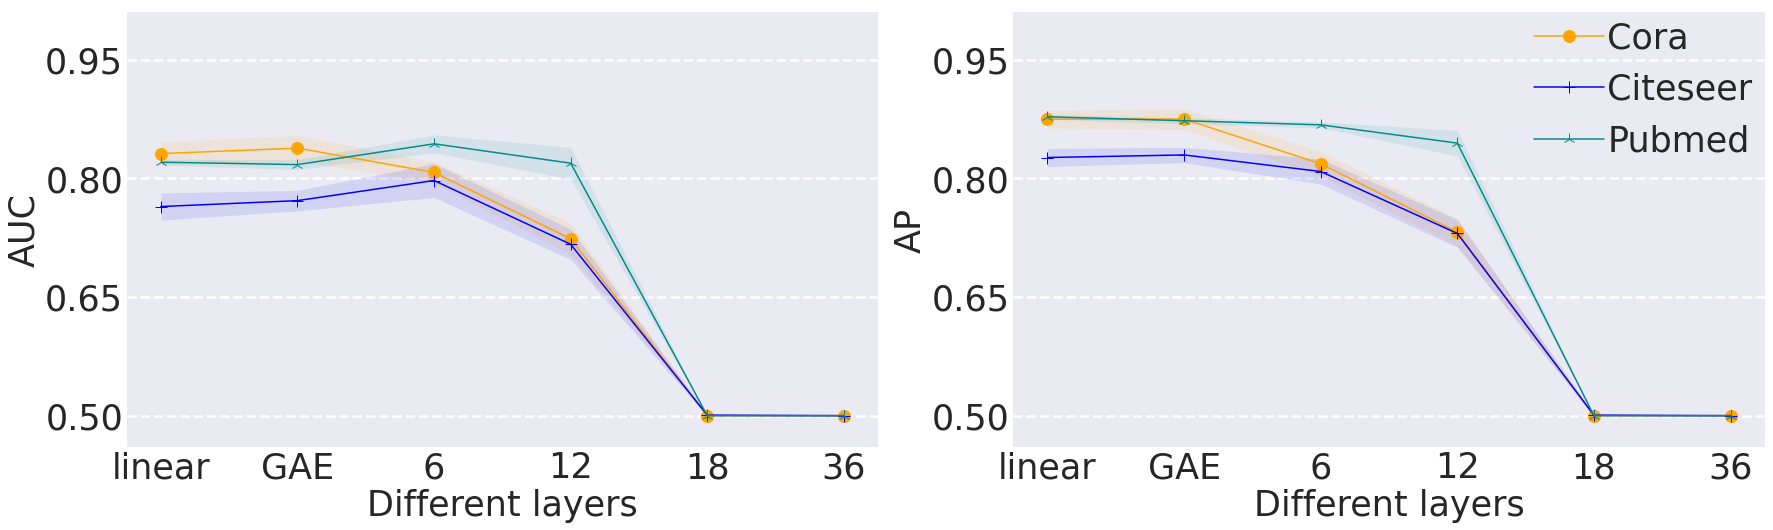

In [4]:
plt.style.use('seaborn-dark')
legend_names=['Cora','Citeseer','Pubmed']

x_names=['linear','GAE','6','12','18','36']
x_names_dis = np.arange(len(x_names))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(26,8))

ax1.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")
ax1.set_xticks(x_names_dis)
ax1.set_xticklabels(x_names,rotation = 0, ha="center")
ax1.set_xlabel('Different layers', fontsize = 35)
ax1.set_yticks(np.arange(0.5,1.01,0.15))
ax1.set_ylabel('AUC', fontsize = 35)
ax1.tick_params(labelsize=35)
ax1.set_ylim([0.46, 1.01])

ax2.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")
ax2.set_xticks(x_names_dis)
ax2.set_xticklabels(x_names,rotation = 0, ha="center")
ax2.set_xlabel('Different layers', fontsize =35)
ax2.set_yticks(np.arange(0.5,1.01,0.15))
ax2.set_ylabel('AP', fontsize = 35)
ax2.tick_params(labelsize=35)
ax2.set_ylim([0.46, 1.01])

markers=['o','+','2','v','s','X','d','>','*','<']
cs=['orange','blue','darkcyan','fuchsia','chocolate','dodgerblue','aqua','green','red','purple']

for i in np.arange(len(legend_names)):
    ax1.plot(x_names_dis, adj_AUC_mean_gather_all_datasets[i], marker=markers[i], c=cs[i],ms=12)
    ax1.fill_between(x_names_dis, np.array(adj_AUC_mean_gather_all_datasets[i])-np.array(adj_AUC_std_gather_all_datasets[i]), np.array(adj_AUC_mean_gather_all_datasets[i])+np.array(adj_AUC_std_gather_all_datasets[i]), color=cs[i], alpha=0.1,linewidth=0.0)

for i in np.arange(len(legend_names)):
    ax2.plot(x_names_dis, np.array(adj_AP_mean_gather_all_datasets[i]), marker=markers[i], c=cs[i],ms=12)
    ax2.fill_between(x_names_dis, np.array(adj_AP_mean_gather_all_datasets[i])-np.array(adj_AP_std_gather_all_datasets[i]),np.array(adj_AP_mean_gather_all_datasets[i])+np.array(adj_AP_std_gather_all_datasets[i]), color=cs[i], alpha=0.1,linewidth=0.0)

plt.subplots_adjust(right=1,wspace =0.18,hspace =0)

fig.legend(labels=legend_names,fontsize=35, loc='upper center', bbox_to_anchor=(0.935,0.92),ncol=1,handletextpad=0.1,columnspacing=1.4, fancybox=True,framealpha=0.1,shadow=True)

plt.show()

In [5]:
fea_AUC_mean_gather_all_datasets=[]
fea_AUC_std_gather_all_datasets=[]
fea_AP_mean_gather_all_datasets=[]
fea_AP_std_gather_all_datasets=[]
    
for datasets_name_i in datasets_name:
    p_path="./GAE/"+datasets_name_i+"_AE/log/"

    fea_AUC_mean_gather=[]
    fea_AUC_std_gather=[]
    fea_AP_mean_gather=[]
    fea_AP_std_gather=[]

    for p_model_name_i in p_model_name:
        p_features_used=True
        p_used_number=10
        AUC_mean_,AUC_std_,AP_mean_,AP_std_=print_results(p_path,p_model_name_i,p_features_used,p_used_number,all_data=False)
        fea_AUC_mean_gather.append(AUC_mean_)
        fea_AUC_std_gather.append(AUC_std_)
        fea_AP_mean_gather.append(AP_mean_)
        fea_AP_std_gather.append(AP_std_)
        print("----------------------------------------------------------\n")
        
    fea_AUC_mean_gather_all_datasets.append(fea_AUC_mean_gather)
    fea_AUC_std_gather_all_datasets.append(fea_AUC_std_gather)
    fea_AP_mean_gather_all_datasets.append(fea_AP_mean_gather)
    fea_AP_std_gather_all_datasets.append(fea_AP_std_gather)

Model name:  linear_ae


Mean AUC score:  0.9186087877031206 
Std of AUC scores:  0.010617277131275873 
 

Mean AP score:  0.932033032696132 
Std of AP scores:  0.00801514009746312 
 

Mean total running time:  51.666830968856814 
Std of total running time:  0.46239075676598423 
 

----------------------------------------------------------

Model name:  gcn_ae


Mean AUC score:  0.9161340731432441 
Std of AUC scores:  0.009203674745407432 
 

Mean AP score:  0.9281461861468927 
Std of AP scores:  0.008181539172444845 
 

Mean total running time:  53.12503952980042 
Std of total running time:  0.6512541129569998 
 

----------------------------------------------------------

Model name:  deep6_gcn_ae


Mean AUC score:  0.8357773224978307 
Std of AUC scores:  0.010140316417395934 
 

Mean AP score:  0.8532294838423354 
Std of AP scores:  0.009708533312740058 
 

Mean total running time:  56.81506969928741 
Std of total running time:  1.0416864913899126 
 

-------------------------------

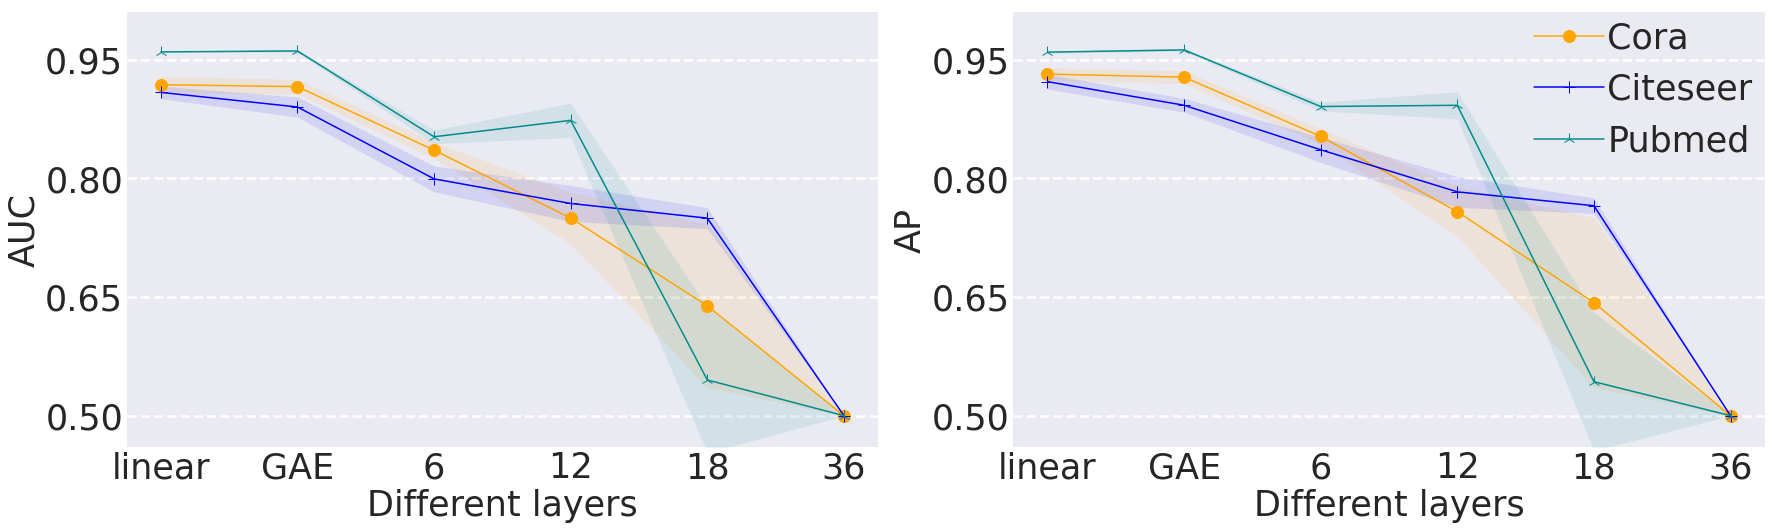

In [6]:
plt.style.use('seaborn-dark')

legend_names=['Cora','Citeseer','Pubmed']
x_names=['linear','GAE','6','12','18','36']
x_names_dis = np.arange(len(x_names))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(26,8))

ax1.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")
ax1.set_xticks(x_names_dis)
ax1.set_xticklabels(x_names,rotation = 0, ha="center")
ax1.set_xlabel('Different layers', fontsize = 35)
ax1.set_yticks(np.arange(0.5,1.01,0.15))
ax1.set_ylabel('AUC', fontsize = 35)
ax1.tick_params(labelsize=35)
ax1.set_ylim([0.46, 1.01])

ax2.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")
ax2.set_xticks(x_names_dis)
ax2.set_xticklabels(x_names,rotation = 0, ha="center")
ax2.set_xlabel('Different layers', fontsize =35)
ax2.set_yticks(np.arange(0.5,1.01,0.15))
ax2.set_ylabel('AP', fontsize = 35)
ax2.tick_params(labelsize=35)
ax2.set_ylim([0.46, 1.01])

markers=['o','+','2','v','s','X','d','>','*','<']
cs=['orange','blue','darkcyan','fuchsia','chocolate','dodgerblue','aqua','green','red','purple']

for i in np.arange(len(legend_names)):
    ax1.plot(x_names_dis, fea_AUC_mean_gather_all_datasets[i], marker=markers[i], c=cs[i],ms=12)
    ax1.fill_between(x_names_dis, np.array(fea_AUC_mean_gather_all_datasets[i])-np.array(fea_AUC_std_gather_all_datasets[i]), np.array(fea_AUC_mean_gather_all_datasets[i])+np.array(fea_AUC_std_gather_all_datasets[i]), color=cs[i], alpha=0.1,linewidth=0.0)

for i in np.arange(len(legend_names)):
    ax2.plot(x_names_dis, np.array(fea_AP_mean_gather_all_datasets[i]), marker=markers[i], c=cs[i],ms=12)
    ax2.fill_between(x_names_dis, np.array(fea_AP_mean_gather_all_datasets[i])-np.array(fea_AP_std_gather_all_datasets[i]),np.array(fea_AP_mean_gather_all_datasets[i])+np.array(fea_AP_std_gather_all_datasets[i]), color=cs[i], alpha=0.1,linewidth=0.0)

plt.subplots_adjust(right=1,wspace =0.18,hspace =0)

fig.legend(labels=legend_names,fontsize=35, loc='upper center', bbox_to_anchor=(0.935,0.92),ncol=1,handletextpad=0.1,columnspacing=1.4, fancybox=True,framealpha=0.1,shadow=True)

plt.show()